## EDA NYC Airbnb rental prices pipeline project

This notebook is versioned with Weights and Biases and provides basic EDA on the NYC Airbnb rental prices dataset

### Import libraries

In [104]:
import wandb
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
os.environ['WANDB_NOTEBOOK_NAME'] = 'EDA'

run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
local_path = wandb.use_artifact("sample.csv:latest").file()
df = pd.read_csv(local_path)

wandb: wandb version 0.15.3 is available!  To upgrade, please run:
wandb:  $ pip install wandb --upgrade
wandb: Network error (SSLError), entering retry loop.


wandb: Network error resolved after 0:00:18.155247, resuming normal operation.


#### EDA

Here we make some simple plots of our data and look at some desciptive statistics

In [106]:
# small display of dataframe
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


In [107]:
# some dtypes
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

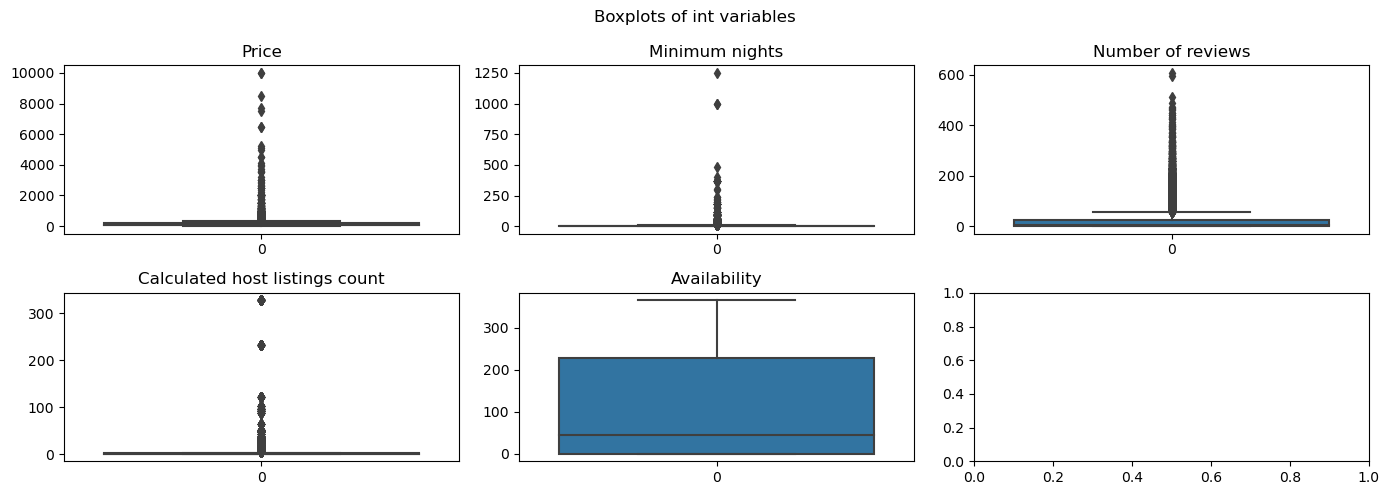

In [108]:
# plots of int variables
fig, axes = plt.subplots(2, 3, figsize=(14,5))
fig.suptitle('Boxplots of int variables')
axes[0,0].set_title('Price')
axes[0,1].set_title('Minimum nights')
axes[0,2].set_title('Number of reviews')
axes[1,0].set_title('Calculated host listings count')
axes[1,1].set_title('Availability')

sns.boxplot(data = df["price"],ax=axes[0,0])
sns.boxplot(data = df["minimum_nights"],ax=axes[0,1])
sns.boxplot(data = df["number_of_reviews"],ax=axes[0,2])
sns.boxplot(data = df["calculated_host_listings_count"],ax=axes[1,0])
sns.boxplot(data = df["availability_365"],ax=axes[1,1])
plt.tight_layout()

**Observation:** Quite some variables have outliers. These outliers can have an influence on modelling efforts (especially linear methods will suffer from this)

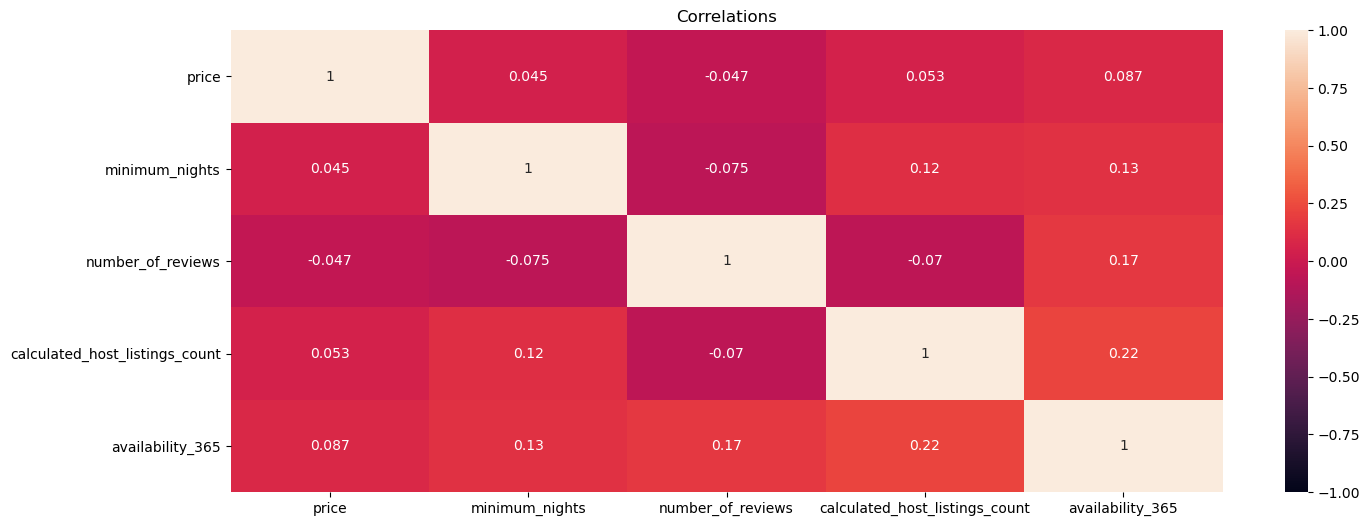

In [109]:
# some bivariate relations
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df[['price','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']].corr(), vmin=-1, vmax=1, annot=True)
plt.title('Correlations');

**Observation:** We have already seen that there are outliers among the variables. This can also have an effect on the above correlation plot. Note also that these are pearson correlations. Correlations assume a linear relation with variables while in fact there doesn't need to be a linear relation. There are better methods to assess the bivariate relations like for example phik (seel also python package phik)

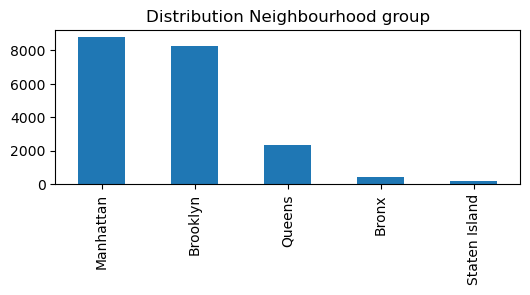

In [110]:
df['neighbourhood_group'].value_counts(dropna=False)[:20].plot(kind='bar', figsize=(6,2))
plt.title('Distribution Neighbourhood group');

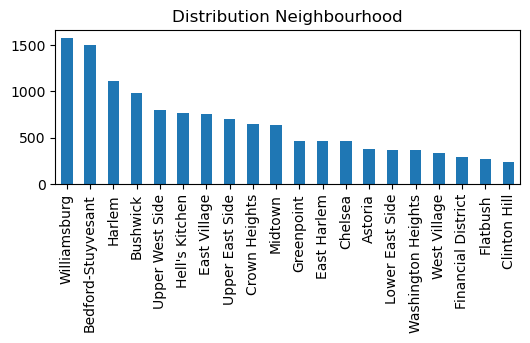

In [111]:
df['neighbourhood'].value_counts(dropna=False)[:20].plot(kind='bar', figsize=(6,2))
plt.title('Distribution Neighbourhood');

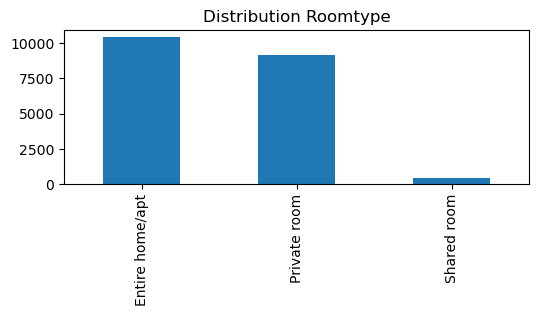

In [112]:
df['room_type'].value_counts(dropna=False)[:20].plot(kind='bar', figsize=(6,2))
plt.title('Distribution Roomtype');

In [113]:
# percentage missing values
df.isnull().sum()/df.shape[0]*100

id                                 0.000
name                               0.035
host_id                            0.000
host_name                          0.040
neighbourhood_group                0.000
neighbourhood                      0.000
latitude                           0.000
longitude                          0.000
room_type                          0.000
price                              0.000
minimum_nights                     0.000
number_of_reviews                  0.000
last_review                       20.615
reviews_per_month                 20.615
calculated_host_listings_count     0.000
availability_365                   0.000
dtype: float64

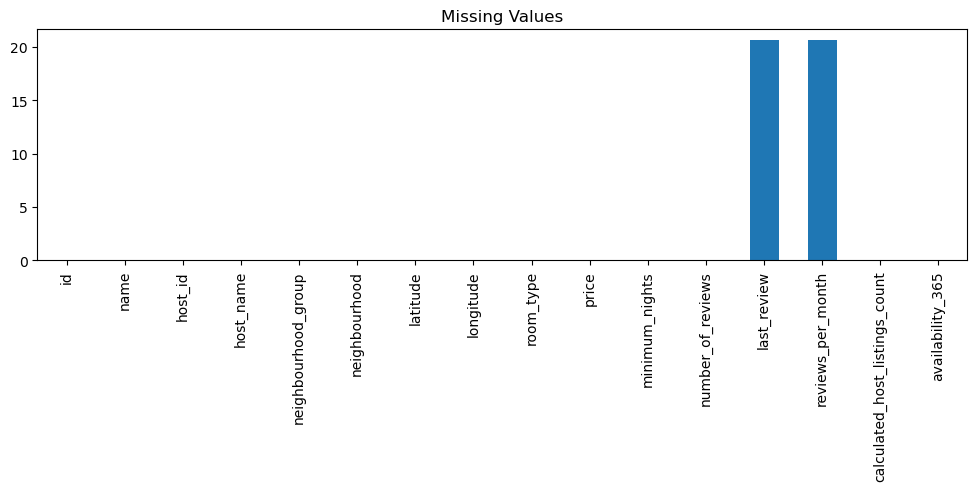

In [114]:
# Missing values
(df.isnull().sum()/df.shape[0]*100).plot(kind='bar', figsize=(12,3))
plt.title('Missing Values');

**Observation:** We see (especially) a lot of missing values on last_review and reviews_per_month. We have also already see this variable is coded as object instead of datetime

In [115]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

In [116]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

In [118]:
run.finish()